In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Machine Learning/excelData/AnnualPowerLoad.csv")

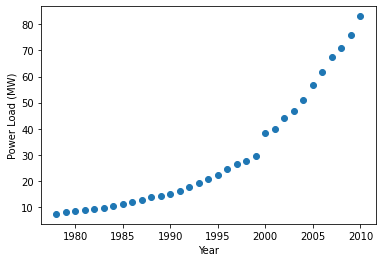

In [ ]:
x = df['Year']
y = df['Beijing city']

plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Power Load (MW)')
plt.show()

## **Define linearRegression function**

In [ ]:
def linearRegression(x, y):
  X_inv = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T)
  A = X_inv.dot(y)

  return x.dot(A), A

# **Use 3 years of power load ($Y_{i}, Y_{i+1}, Y_{i+2}$) to predict the next year power load $Y_{i+4}$**

In [ ]:
x_column = np.array([[y[i], y[i+1], y[i+2]] for i in range(y.shape[0]-3)])
print(x_column.shape)
print(x_column)

(30, 3)
[[ 7.35   8.023  8.546]
 [ 8.023  8.546  8.672]
 [ 8.546  8.672  9.257]
 [ 8.672  9.257  9.563]
 [ 9.257  9.563 10.294]
 [ 9.563 10.294 11.063]
 [10.294 11.063 11.812]
 [11.063 11.812 12.85 ]
 [11.812 12.85  13.786]
 [12.85  13.786 14.218]
 [13.786 14.218 15.048]
 [14.218 15.048 16.14 ]
 [15.048 16.14  17.596]
 [16.14  17.596 19.25 ]
 [17.596 19.25  20.545]
 [19.25  20.545 22.259]
 [20.545 22.259 24.437]
 [22.259 24.437 26.361]
 [24.437 26.361 27.621]
 [26.361 27.621 29.726]
 [27.621 29.726 38.443]
 [29.726 38.443 39.994]
 [38.443 39.994 43.996]
 [39.994 43.996 46.761]
 [43.996 46.761 51.011]
 [46.761 51.011 56.704]
 [51.011 56.704 61.899]
 [56.704 61.899 67.509]
 [61.899 67.509 70.815]
 [67.509 70.815 75.885]]


# Create y_true for these input $Y_{i}, Y_{i+1}, Y_{i+2}$ </br>
# y_true = $Y_{i+4}$ </br>
# Then the 3rd of y must be leave.

In [ ]:
y_true = np.array(y[3 : ])
print(y_true.shape)
print(y_true)

(30,)
[ 8.672  9.257  9.563 10.294 11.063 11.812 12.85  13.786 14.218 15.048
 16.14  17.596 19.25  20.545 22.259 24.437 26.361 27.621 29.726 38.443
 39.994 43.996 46.761 51.011 56.704 61.899 67.509 70.815 75.885 83.09 ]


# Call linearRegression function

In [ ]:
y_predict, coeff = linearRegression(x_column, y_true)

In [ ]:
print('coeff\n', coeff)
print('y_predict\n', y_predict)

coeff
 [0.12509033 0.13272853 0.85588674]
y_predict
 [ 8.672       8.93344454  9.51628431  9.87159322 10.6110392  11.40451829
 12.23908672 13.32310528 14.35568013 14.97950086 15.86431012 16.96314213
 18.45807774 20.20356577 21.71360359 23.5593763  25.81298627 27.9631999
 29.56943361 31.77898692 39.67675895 42.42454898 47.14608201 50.2378035
 54.74292799 60.52546216 66.25905114 72.46223965 76.68625248 82.16615547]


# Improve offset at the first data

In [ ]:
offset = y_true[0] - y_predict[0]
y_predict += offset
print('y_predict\n', y_predict)

y_predict
 [ 8.672       8.93344454  9.51628431  9.87159322 10.6110392  11.40451829
 12.23908672 13.32310528 14.35568013 14.97950086 15.86431012 16.96314213
 18.45807774 20.20356577 21.71360359 23.5593763  25.81298627 27.9631999
 29.56943361 31.77898692 39.67675895 42.42454898 47.14608201 50.2378035
 54.74292799 60.52546216 66.25905114 72.46223965 76.68625248 82.16615547]


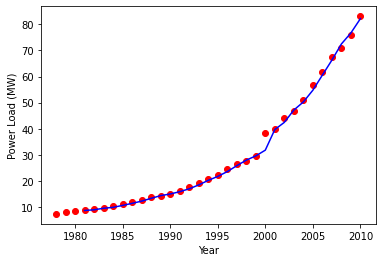

In [ ]:
plt.scatter(x, y, color='r')
plt.plot(x[3:], y_predict, color='b')
plt.xlabel('Year')
plt.ylabel('Power Load (MW)')
plt.show()

# Predict power load in year 2011

In [ ]:
x_2009_to_2010 = np.array(x_column[29])
x_2009_to_2010

array([67.509, 70.815, 75.885])

In [ ]:
y_2011 = x_2009_to_2010.dot(coeff)
y_2011

82.79285837627938